### References: 
1) https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
2) https://predictivehacks.com/how-to-run-sentiment-analysis-in-python-using-vader/
3) https://aronakhmad.medium.com/twitter-data-cleaning-using-python-db1ec2f28f08

In [69]:
!pip install pandas --upgrade

/Users/ajinkyapawale/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
!pip3 install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 3.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136900 sha256=f821b345d7caaf3ddf38fcabe4d73758b1e1e9425d38bcd7857460749372cfbe
  Stored in directory: /Users/ajinkyapawale/Library/Caches/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=1333220964e54fb25b07bc5354f8bd747172497c049a4f0a56af51c44c2f85b9
  Stored in directory: /Users/ajinkyapawale/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built pyLDAvis skl

In [155]:
! pip3 install gensim

     |████████████████████████████████| 24.0 MB 2.7 MB/s eta 0:00:01     |████████████████████████████    | 21.1 MB 2.8 MB/s eta 0:00:02


In [1]:
!pip install -U 'spacy[apple]'

In [26]:
!python -m spacy download en_core_web_sm

In [31]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ajinkyapawale/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajinkyapawale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ajinkyapawale/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ajinkyapawale/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [712]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  as gensimvis
import matplotlib.pyplot as plt

In [713]:
df1 = pd.read_csv('tweets_phase1.csv')
df2= pd.read_csv('tweets_phase2.csv')

In [714]:
df1

,date,content,user,geo_tag
0,2016-12-08 20:50:00+00:00,@Narendramodi_PM might have had good intention...,"{'username': 'MesoriseWorld', 'id': 1246773612...",New Delhi
1,2016-12-08 17:35:34+00:00,There has been a major cut off in Oxygen of Co...,"{'username': 'FastNewsDelhi', 'id': 2472585180...",New Delhi
2,2016-12-08 17:15:24+00:00,.@narendramodi @arunjaitley We are supporting ...,"{'username': 'GauravJaini', 'id': 918870559, '...",New Delhi
3,2016-12-08 16:45:32+00:00,@TimesNow ANAND FORGOT HE WAS ANCHORING A PROG...,"{'username': 'pronabchaky', 'id': 3242409536, ...",New Delhi
4,2016-12-08 12:22:47+00:00,Join us as me and my colleagues bring you a gr...,"{'username': 'scribe_prashant', 'id': 49305941...",New Delhi
...,...,...,...,...
998,2016-11-23 04:04:39+00:00,"@SameenAdeeb @tajmahalfoxtrot @scroll_in, Arti...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur
999,2016-11-23 02:45:32+00:00,@bukharishujaat @ShujaUH it was essentially to...,"{'username': 'DrRupani', 'id': 2160285660, 'di...",Jaipur
1000,2016-11-22 15:42:05+00:00,@kiran_patniak @tanveer1729 @EconomicTimes Are...,"{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur
1001,2016-11-22 15:34:51+00:00,"@minimathur! Plan is clear, make #BlackMoney u...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur


In [715]:
df1[df1['geo_tag']=='Jairpur']

,date,content,user,geo_tag


In [716]:
df1.groupby(['geo_tag']).count()

,date,content,user
geo_tag,,,
Ahmedabad,100,100,100
Bangalore,100,100,100
Chennai,100,100,100
Hyderabad,100,100,100
Jaipur,99,99,99
Kolkata,100,100,100
Lucknow,100,100,100
Mumbai,100,100,100
New Delhi,100,100,100


In [717]:
df1.drop_duplicates("content",
                     keep = False, inplace = True)

In [718]:
df1 = df1.reset_index(drop=True)

In [719]:
df1

,date,content,user,geo_tag
0,2016-12-08 20:50:00+00:00,@Narendramodi_PM might have had good intention...,"{'username': 'MesoriseWorld', 'id': 1246773612...",New Delhi
1,2016-12-08 17:35:34+00:00,There has been a major cut off in Oxygen of Co...,"{'username': 'FastNewsDelhi', 'id': 2472585180...",New Delhi
2,2016-12-08 17:15:24+00:00,.@narendramodi @arunjaitley We are supporting ...,"{'username': 'GauravJaini', 'id': 918870559, '...",New Delhi
3,2016-12-08 16:45:32+00:00,@TimesNow ANAND FORGOT HE WAS ANCHORING A PROG...,"{'username': 'pronabchaky', 'id': 3242409536, ...",New Delhi
4,2016-12-08 12:22:47+00:00,Join us as me and my colleagues bring you a gr...,"{'username': 'scribe_prashant', 'id': 49305941...",New Delhi
...,...,...,...,...
956,2016-11-23 04:04:39+00:00,"@SameenAdeeb @tajmahalfoxtrot @scroll_in, Arti...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur
957,2016-11-23 02:45:32+00:00,@bukharishujaat @ShujaUH it was essentially to...,"{'username': 'DrRupani', 'id': 2160285660, 'di...",Jaipur
958,2016-11-22 15:42:05+00:00,@kiran_patniak @tanveer1729 @EconomicTimes Are...,"{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur
959,2016-11-22 15:34:51+00:00,"@minimathur! Plan is clear, make #BlackMoney u...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur


In [720]:
df1.groupby(['geo_tag']).count()

,date,content,user
geo_tag,,,
Ahmedabad,96,96,96
Bangalore,96,96,96
Chennai,92,92,92
Hyderabad,94,94,94
Jaipur,95,95,95
Kolkata,100,100,100
Lucknow,90,90,90
Mumbai,100,100,100
New Delhi,100,100,100


In [721]:
df2

,date,content,user,geo_tag
0,2017-01-08 19:33:10+00:00,Transaction fee on e-payments is bad concept p...,"{'username': 'vijaysardana', 'id': 43716433, '...",New Delhi
1,2017-01-08 16:55:54+00:00,What did we achieve by #Demonetization? \n150+...,"{'username': 'LaraibNeyazi', 'id': 206594971, ...",New Delhi
2,2017-01-08 16:53:58+00:00,Another setback to the demonetization drive as...,"{'username': 'imsyedsuhail', 'id': 83112060, '...",New Delhi
3,2017-01-07 18:01:33+00:00,@htTweets may be it would be a correct analysi...,"{'username': 'vinodmishra64', 'id': 22483220, ...",New Delhi
4,2017-01-07 11:06:33+00:00,PM @narendramodi begins his speech at @BJP4Ind...,"{'username': 'payalmehta100', 'id': 104473820,...",New Delhi
...,...,...,...,...
941,2016-12-13 06:26:15+00:00,Dear PM of India post office also involved in ...,"{'username': 'rrchoudhary01', 'id': 588085424,...",Jaipur
942,2016-12-12 15:18:19+00:00,"@legalhelp2u @rssurjewala oh really, every day...","{'username': 'kapil9994', 'id': 210057853, 'di...",Jaipur
943,2016-12-12 12:34:39+00:00,@sri9011 @subh851 What is Private in Banks whe...,"{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur
944,2016-12-12 12:23:01+00:00,"For a Cashless society &amp; Curb Black Money,...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur


In [722]:
df2.drop_duplicates(subset ="content",
                     keep = False, inplace = True)

In [723]:
df2 = df2.reset_index(drop=True)

In [724]:
df2

,date,content,user,geo_tag
0,2017-01-08 19:33:10+00:00,Transaction fee on e-payments is bad concept p...,"{'username': 'vijaysardana', 'id': 43716433, '...",New Delhi
1,2017-01-08 16:55:54+00:00,What did we achieve by #Demonetization? \n150+...,"{'username': 'LaraibNeyazi', 'id': 206594971, ...",New Delhi
2,2017-01-08 16:53:58+00:00,Another setback to the demonetization drive as...,"{'username': 'imsyedsuhail', 'id': 83112060, '...",New Delhi
3,2017-01-07 18:01:33+00:00,@htTweets may be it would be a correct analysi...,"{'username': 'vinodmishra64', 'id': 22483220, ...",New Delhi
4,2017-01-07 11:06:33+00:00,PM @narendramodi begins his speech at @BJP4Ind...,"{'username': 'payalmehta100', 'id': 104473820,...",New Delhi
...,...,...,...,...
921,2016-12-13 06:26:15+00:00,Dear PM of India post office also involved in ...,"{'username': 'rrchoudhary01', 'id': 588085424,...",Jaipur
922,2016-12-12 15:18:19+00:00,"@legalhelp2u @rssurjewala oh really, every day...","{'username': 'kapil9994', 'id': 210057853, 'di...",Jaipur
923,2016-12-12 12:34:39+00:00,@sri9011 @subh851 What is Private in Banks whe...,"{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur
924,2016-12-12 12:23:01+00:00,"For a Cashless society &amp; Curb Black Money,...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur


### Removing hashtags wihtout the words that follow, punctuations, any links, usernames tagged, also new line \n

In [725]:
df1['content'][30]

'Just curious..have you spent more time discussing/ reading #Demonetization or lining up at ATM/ bank queues?'

In [726]:
df1['clean content'] = ""
for i in range (len(df1)):
    df1['clean content'][i] = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|http\S+|\n", "", df1['content'][i])

In [727]:
df1

,date,content,user,geo_tag,clean content
0,2016-12-08 20:50:00+00:00,@Narendramodi_PM might have had good intention...,"{'username': 'MesoriseWorld', 'id': 1246773612...",New Delhi,might have had good intention behind demoneti...
1,2016-12-08 17:35:34+00:00,There has been a major cut off in Oxygen of Co...,"{'username': 'FastNewsDelhi', 'id': 2472585180...",New Delhi,There has been a major cut off in Oxygen of Co...
2,2016-12-08 17:15:24+00:00,.@narendramodi @arunjaitley We are supporting ...,"{'username': 'GauravJaini', 'id': 918870559, '...",New Delhi,We are supporting Demonetization to support ...
3,2016-12-08 16:45:32+00:00,@TimesNow ANAND FORGOT HE WAS ANCHORING A PROG...,"{'username': 'pronabchaky', 'id': 3242409536, ...",New Delhi,ANAND FORGOT HE WAS ANCHORING A PROG ON DEMON...
4,2016-12-08 12:22:47+00:00,Join us as me and my colleagues bring you a gr...,"{'username': 'scribe_prashant', 'id': 49305941...",New Delhi,Join us as me and my colleagues bring you a gr...
...,...,...,...,...,...
956,2016-11-23 04:04:39+00:00,"@SameenAdeeb @tajmahalfoxtrot @scroll_in, Arti...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,Article black money problem is important i...
957,2016-11-23 02:45:32+00:00,@bukharishujaat @ShujaUH it was essentially to...,"{'username': 'DrRupani', 'id': 2160285660, 'di...",Jaipur,it was essentially to unearth black money w...
958,2016-11-22 15:42:05+00:00,@kiran_patniak @tanveer1729 @EconomicTimes Are...,"{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,1729 Are you sure of blackmoney with them Or...
959,2016-11-22 15:34:51+00:00,"@minimathur! Plan is clear, make #BlackMoney u...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,Plan is clear make BlackMoney useless amp com...


In [728]:
df1['content'][9]

'An interesting read Why #demonetization will likely succeed in India.Will this help digitizing Indian economy? More@ https://t.co/JEgGlPMa5b https://t.co/qpgj07fyiO'

In [729]:
df1['clean content'][9]

'An interesting read Why demonetization will likely succeed in IndiaWill this help digitizing Indian economy More  '

In [730]:
analyzer = SentimentIntensityAnalyzer()
df1['neg'] = df1['clean content'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df1['neu'] = df1['clean content'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df1['pos'] = df1['clean content'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df1['compound'] = df1['clean content'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df1

,date,content,user,geo_tag,clean content,neg,neu,pos,compound
0,2016-12-08 20:50:00+00:00,@Narendramodi_PM might have had good intention...,"{'username': 'MesoriseWorld', 'id': 1246773612...",New Delhi,might have had good intention behind demoneti...,0.185,0.708,0.106,-0.3506
1,2016-12-08 17:35:34+00:00,There has been a major cut off in Oxygen of Co...,"{'username': 'FastNewsDelhi', 'id': 2472585180...",New Delhi,There has been a major cut off in Oxygen of Co...,0.180,0.820,0.000,-0.5267
2,2016-12-08 17:15:24+00:00,.@narendramodi @arunjaitley We are supporting ...,"{'username': 'GauravJaini', 'id': 918870559, '...",New Delhi,We are supporting Demonetization to support ...,0.000,0.714,0.286,0.6808
3,2016-12-08 16:45:32+00:00,@TimesNow ANAND FORGOT HE WAS ANCHORING A PROG...,"{'username': 'pronabchaky', 'id': 3242409536, ...",New Delhi,ANAND FORGOT HE WAS ANCHORING A PROG ON DEMON...,0.138,0.739,0.123,-0.0772
4,2016-12-08 12:22:47+00:00,Join us as me and my colleagues bring you a gr...,"{'username': 'scribe_prashant', 'id': 49305941...",New Delhi,Join us as me and my colleagues bring you a gr...,0.104,0.632,0.264,0.5106
...,...,...,...,...,...,...,...,...,...
956,2016-11-23 04:04:39+00:00,"@SameenAdeeb @tajmahalfoxtrot @scroll_in, Arti...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,Article black money problem is important i...,0.148,0.656,0.197,-0.0258
957,2016-11-23 02:45:32+00:00,@bukharishujaat @ShujaUH it was essentially to...,"{'username': 'DrRupani', 'id': 2160285660, 'di...",Jaipur,it was essentially to unearth black money w...,0.000,1.000,0.000,0.0000
958,2016-11-22 15:42:05+00:00,@kiran_patniak @tanveer1729 @EconomicTimes Are...,"{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,1729 Are you sure of blackmoney with them Or...,0.064,0.727,0.209,0.4939
959,2016-11-22 15:34:51+00:00,"@minimathur! Plan is clear, make #BlackMoney u...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,Plan is clear make BlackMoney useless amp com...,0.103,0.696,0.201,0.4005


In [731]:
df1['sentiment'] = df1['compound'].apply(lambda x:'Positive' if(x>0.05) else ('Negative' if x<-0.05 else 'Neutral'))

In [732]:
df1

,date,content,user,geo_tag,clean content,neg,neu,pos,compound,sentiment
0,2016-12-08 20:50:00+00:00,@Narendramodi_PM might have had good intention...,"{'username': 'MesoriseWorld', 'id': 1246773612...",New Delhi,might have had good intention behind demoneti...,0.185,0.708,0.106,-0.3506,Negative
1,2016-12-08 17:35:34+00:00,There has been a major cut off in Oxygen of Co...,"{'username': 'FastNewsDelhi', 'id': 2472585180...",New Delhi,There has been a major cut off in Oxygen of Co...,0.180,0.820,0.000,-0.5267,Negative
2,2016-12-08 17:15:24+00:00,.@narendramodi @arunjaitley We are supporting ...,"{'username': 'GauravJaini', 'id': 918870559, '...",New Delhi,We are supporting Demonetization to support ...,0.000,0.714,0.286,0.6808,Positive
3,2016-12-08 16:45:32+00:00,@TimesNow ANAND FORGOT HE WAS ANCHORING A PROG...,"{'username': 'pronabchaky', 'id': 3242409536, ...",New Delhi,ANAND FORGOT HE WAS ANCHORING A PROG ON DEMON...,0.138,0.739,0.123,-0.0772,Negative
4,2016-12-08 12:22:47+00:00,Join us as me and my colleagues bring you a gr...,"{'username': 'scribe_prashant', 'id': 49305941...",New Delhi,Join us as me and my colleagues bring you a gr...,0.104,0.632,0.264,0.5106,Positive
...,...,...,...,...,...,...,...,...,...,...
956,2016-11-23 04:04:39+00:00,"@SameenAdeeb @tajmahalfoxtrot @scroll_in, Arti...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,Article black money problem is important i...,0.148,0.656,0.197,-0.0258,Neutral
957,2016-11-23 02:45:32+00:00,@bukharishujaat @ShujaUH it was essentially to...,"{'username': 'DrRupani', 'id': 2160285660, 'di...",Jaipur,it was essentially to unearth black money w...,0.000,1.000,0.000,0.0000,Neutral
958,2016-11-22 15:42:05+00:00,@kiran_patniak @tanveer1729 @EconomicTimes Are...,"{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,1729 Are you sure of blackmoney with them Or...,0.064,0.727,0.209,0.4939,Positive
959,2016-11-22 15:34:51+00:00,"@minimathur! Plan is clear, make #BlackMoney u...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,Plan is clear make BlackMoney useless amp com...,0.103,0.696,0.201,0.4005,Positive


In [733]:
df1['sentiment'].value_counts()

Positive    358
Negative    352
Neutral     251
Name: sentiment, dtype: int64

/Users/ajinkyapawale/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


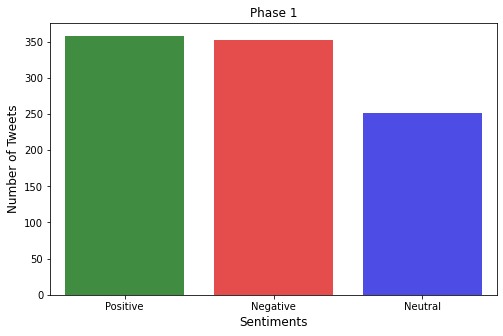

In [734]:
senti_count  = df1['sentiment'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(senti_count.index, senti_count.values, alpha=0.8,palette=dict(Positive="green", Negative="Red", Neutral="Blue"))
plt.title('Phase 1')
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Sentiments', fontsize=12)
plt.show()

In [735]:
df1['content'][7]

'BIGGEST POSITIVE RESULT OF DEMONETIZATION! MAN BEHIND FAKE INDIAN CURRENCIES COMMIT SUICIDE IN PAKISTAN!\n\nhttps://t.co/LcIgExd1EH'

In [736]:
df1['clean content'][7]

'BIGGEST POSITIVE RESULT OF DEMONETIZATION MAN BEHIND FAKE INDIAN CURRENCIES COMMIT SUICIDE IN PAKISTAN'

In [737]:
df1.iloc[13]

date                                     2016-12-08 06:13:43+00:00
content          @HimanshuVDave1 @sardesairajdeep True and proc...
user             {'username': 'WadehraRajiv', 'id': 2780586890,...
geo_tag                                                  New Delhi
clean content    1  True and process has been accelerated due 2...
neg                                                          0.337
neu                                                          0.588
pos                                                          0.075
compound                                                   -0.8271
sentiment                                                 Negative
Name: 13, dtype: object

In [738]:
df_group = df1.groupby(['geo_tag','sentiment'])['sentiment'].count()

In [739]:
df3 = df_group.groupby(level=0).apply(lambda x:round(100 * x / float(x.sum()),1))
print(df3)


geo_tag    sentiment
Ahmedabad  Negative     38.5
           Neutral      21.9
           Positive     39.6
Bangalore  Negative     40.6
           Neutral      35.4
           Positive     24.0
Chennai    Negative     34.8
           Neutral      26.1
           Positive     39.1
Hyderabad  Negative     24.5
           Neutral      37.2
           Positive     38.3
Jaipur     Negative     32.6
           Neutral      22.1
           Positive     45.3
Kolkata    Negative     39.0
           Neutral      25.0
           Positive     36.0
Lucknow    Negative     45.6
           Neutral      24.4
           Positive     30.0
Mumbai     Negative     34.0
           Neutral      25.0
           Positive     41.0
New Delhi  Negative     42.0
           Neutral      22.0
           Positive     36.0
Pune       Negative     34.4
           Neutral      22.9
           Positive     42.7
Name: sentiment, dtype: float64


### Repeating the same steps for Phase 2

In [740]:
df2['clean content'] = ""
for i in range (len(df2)):
    df2['clean content'][i] = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|http\S+|\n", "", df2['content'][i])


In [741]:
df2

,date,content,user,geo_tag,clean content
0,2017-01-08 19:33:10+00:00,Transaction fee on e-payments is bad concept p...,"{'username': 'vijaysardana', 'id': 43716433, '...",New Delhi,Transaction fee on epayments is bad concept po...
1,2017-01-08 16:55:54+00:00,What did we achieve by #Demonetization? \n150+...,"{'username': 'LaraibNeyazi', 'id': 206594971, ...",New Delhi,What did we achieve by Demonetization 150 Deat...
2,2017-01-08 16:53:58+00:00,Another setback to the demonetization drive as...,"{'username': 'imsyedsuhail', 'id': 83112060, '...",New Delhi,Another setback to the demonetization drive as...
3,2017-01-07 18:01:33+00:00,@htTweets may be it would be a correct analysi...,"{'username': 'vinodmishra64', 'id': 22483220, ...",New Delhi,may be it would be a correct analysis but con...
4,2017-01-07 11:06:33+00:00,PM @narendramodi begins his speech at @BJP4Ind...,"{'username': 'payalmehta100', 'id': 104473820,...",New Delhi,PM begins his speech at 4India NationalExecut...
...,...,...,...,...,...
921,2016-12-13 06:26:15+00:00,Dear PM of India post office also involved in ...,"{'username': 'rrchoudhary01', 'id': 588085424,...",Jaipur,Dear PM of India post office also involved in ...
922,2016-12-12 15:18:19+00:00,"@legalhelp2u @rssurjewala oh really, every day...","{'username': 'kapil9994', 'id': 210057853, 'di...",Jaipur,2u oh really every day black money holder cat...
923,2016-12-12 12:34:39+00:00,@sri9011 @subh851 What is Private in Banks whe...,"{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,11 851 What is Private in Banks when Fighting ...
924,2016-12-12 12:23:01+00:00,"For a Cashless society &amp; Curb Black Money,...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,For a Cashless society amp Curb Black Money w...


In [742]:
df2['content'][9]

'Nothing like telling it as it is from ground zero-- demonetization to poltics, no holds barred @ChanderudayUday @rajuparulekar @aroonpurie https://t.co/Yn6VVm793Z'

In [743]:
df2['clean content'][9]

'Nothing like telling it as it is from ground zero demonetization to poltics no holds barred    '

In [744]:
analyzer = SentimentIntensityAnalyzer()
df2['neg'] = df2['clean content'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df2['neu'] = df2['clean content'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df2['pos'] = df2['clean content'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df2['compound'] = df2['clean content'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df2

,date,content,user,geo_tag,clean content,neg,neu,pos,compound
0,2017-01-08 19:33:10+00:00,Transaction fee on e-payments is bad concept p...,"{'username': 'vijaysardana', 'id': 43716433, '...",New Delhi,Transaction fee on epayments is bad concept po...,0.388,0.612,0.000,-0.8860
1,2017-01-08 16:55:54+00:00,What did we achieve by #Demonetization? \n150+...,"{'username': 'LaraibNeyazi', 'id': 206594971, ...",New Delhi,What did we achieve by Demonetization 150 Deat...,0.199,0.705,0.095,-0.3612
2,2017-01-08 16:53:58+00:00,Another setback to the demonetization drive as...,"{'username': 'imsyedsuhail', 'id': 83112060, '...",New Delhi,Another setback to the demonetization drive as...,0.128,0.872,0.000,-0.2960
3,2017-01-07 18:01:33+00:00,@htTweets may be it would be a correct analysi...,"{'username': 'vinodmishra64', 'id': 22483220, ...",New Delhi,may be it would be a correct analysis but con...,0.156,0.844,0.000,-0.4497
4,2017-01-07 11:06:33+00:00,PM @narendramodi begins his speech at @BJP4Ind...,"{'username': 'payalmehta100', 'id': 104473820,...",New Delhi,PM begins his speech at 4India NationalExecut...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
921,2016-12-13 06:26:15+00:00,Dear PM of India post office also involved in ...,"{'username': 'rrchoudhary01', 'id': 588085424,...",Jaipur,Dear PM of India post office also involved in ...,0.000,0.890,0.110,0.3818
922,2016-12-12 15:18:19+00:00,"@legalhelp2u @rssurjewala oh really, every day...","{'username': 'kapil9994', 'id': 210057853, 'di...",Jaipur,2u oh really every day black money holder cat...,0.131,0.869,0.000,-0.3412
923,2016-12-12 12:34:39+00:00,@sri9011 @subh851 What is Private in Banks whe...,"{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,11 851 What is Private in Banks when Fighting ...,0.267,0.733,0.000,-0.6249
924,2016-12-12 12:23:01+00:00,"For a Cashless society &amp; Curb Black Money,...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,For a Cashless society amp Curb Black Money w...,0.000,1.000,0.000,0.0000


In [745]:
df2['sentiment'] = df2['compound'].apply(lambda x:'Positive' if(x>0.05) else ('Negative' if x<-0.05 else 'Neutral'))

In [746]:
df2

,date,content,user,geo_tag,clean content,neg,neu,pos,compound,sentiment
0,2017-01-08 19:33:10+00:00,Transaction fee on e-payments is bad concept p...,"{'username': 'vijaysardana', 'id': 43716433, '...",New Delhi,Transaction fee on epayments is bad concept po...,0.388,0.612,0.000,-0.8860,Negative
1,2017-01-08 16:55:54+00:00,What did we achieve by #Demonetization? \n150+...,"{'username': 'LaraibNeyazi', 'id': 206594971, ...",New Delhi,What did we achieve by Demonetization 150 Deat...,0.199,0.705,0.095,-0.3612,Negative
2,2017-01-08 16:53:58+00:00,Another setback to the demonetization drive as...,"{'username': 'imsyedsuhail', 'id': 83112060, '...",New Delhi,Another setback to the demonetization drive as...,0.128,0.872,0.000,-0.2960,Negative
3,2017-01-07 18:01:33+00:00,@htTweets may be it would be a correct analysi...,"{'username': 'vinodmishra64', 'id': 22483220, ...",New Delhi,may be it would be a correct analysis but con...,0.156,0.844,0.000,-0.4497,Negative
4,2017-01-07 11:06:33+00:00,PM @narendramodi begins his speech at @BJP4Ind...,"{'username': 'payalmehta100', 'id': 104473820,...",New Delhi,PM begins his speech at 4India NationalExecut...,0.000,1.000,0.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...
921,2016-12-13 06:26:15+00:00,Dear PM of India post office also involved in ...,"{'username': 'rrchoudhary01', 'id': 588085424,...",Jaipur,Dear PM of India post office also involved in ...,0.000,0.890,0.110,0.3818,Positive
922,2016-12-12 15:18:19+00:00,"@legalhelp2u @rssurjewala oh really, every day...","{'username': 'kapil9994', 'id': 210057853, 'di...",Jaipur,2u oh really every day black money holder cat...,0.131,0.869,0.000,-0.3412,Negative
923,2016-12-12 12:34:39+00:00,@sri9011 @subh851 What is Private in Banks whe...,"{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,11 851 What is Private in Banks when Fighting ...,0.267,0.733,0.000,-0.6249,Negative
924,2016-12-12 12:23:01+00:00,"For a Cashless society &amp; Curb Black Money,...","{'username': 'AnilVegomega', 'id': 2776888944,...",Jaipur,For a Cashless society amp Curb Black Money w...,0.000,1.000,0.000,0.0000,Neutral


In [747]:
df2['sentiment'].value_counts()

Positive    332
Negative    325
Neutral     269
Name: sentiment, dtype: int64

/Users/ajinkyapawale/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


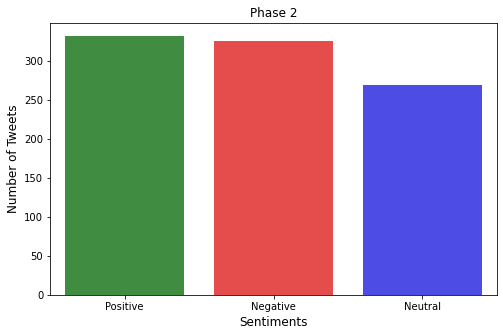

In [748]:
senti_count  = df2['sentiment'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(senti_count.index, senti_count.values, alpha=0.8,palette=dict(Positive="green", Negative="Red", Neutral="Blue"))
plt.title('Phase 2')
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Sentiments', fontsize=12)
plt.show()

In [749]:
29

29

In [750]:
df2['content'][16]

'After Demonetization how much of your transactions are cashless'

In [751]:
df2['clean content'][413]

' Demonetization Trick played on Indians'

In [752]:
df2.iloc[413]

date                                     2017-01-05 03:06:49+00:00
content          @OfficeOfRG https://t.co/F9mNp4qkrS\nDemonetiz...
user             {'username': 'asifiqbalieto', 'id': 7846830792...
geo_tag                                                  Bangalore
clean content               Demonetization Trick played on Indians
neg                                                          0.182
neu                                                          0.455
pos                                                          0.364
compound                                                     0.296
sentiment                                                 Positive
Name: 413, dtype: object

In [753]:
df2_group = df2.groupby(['geo_tag','sentiment'])['sentiment'].count()

In [754]:
df4 = df2_group.groupby(level=0).apply(lambda x:round(100 * x / float(x.sum()),1))
print(df4)

geo_tag    sentiment
Ahmedabad  Negative     38.3
           Neutral      24.5
           Positive     37.2
Bangalore  Negative     34.7
           Neutral      29.6
           Positive     35.7
Chennai    Negative     35.8
           Neutral      33.7
           Positive     30.5
Hyderabad  Negative     32.0
           Neutral      36.0
           Positive     32.0
Jaipur     Negative     21.3
           Neutral      31.9
           Positive     46.8
Kolkata    Negative     33.7
           Neutral      28.6
           Positive     37.8
Lucknow    Negative     42.9
           Neutral      18.4
           Positive     38.8
Mumbai     Negative     34.0
           Neutral      33.0
           Positive     33.0
New Delhi  Negative     29.6
           Neutral      29.6
           Positive     40.8
Pune       Negative     42.7
           Neutral      26.0
           Positive     31.2
Name: sentiment, dtype: float64


## Topic Modelling for Phase 1 Data

In [755]:
stop_words = stopwords.words('english')

In [756]:
# convert to list
data = df1['clean content'].values.tolist()

In [757]:
# tokenize the sentences into words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))

In [758]:
data_words[:1]

[['might',
  'have',
  'had',
  'good',
  'intention',
  'behind',
  'demonetization',
  'undoubtedly',
  'but',
  'the',
  'common',
  'are',
  'losing',
  'their']]

In [759]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['might', 'have', 'had', 'good', 'intention', 'behind', 'demonetization', 'undoubtedly', 'but', 'the', 'common', 'are', 'losing', 'their']


In [760]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatization(texts):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        #doc = " ".join(sent) 
        texts_out.append([lemmatizer.lemmatize(token,get_wordnet_pos(token)) for token in sent])
    return texts_out

In [761]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized = lemmatization(data_words_bigrams)

print(data_lemmatized[:1])

[['might', 'good', 'intention', 'behind', 'demonetization', 'undoubtedly', 'common', 'lose']]


In [762]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


In [763]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=11, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [764]:
doc_lda[0]

([(0, 0.011015038),
  (2, 0.040890086),
  (3, 0.083538756),
  (4, 0.014678681),
  (7, 0.017398834),
  (8, 0.012471119),
  (9, 0.79248005)],
 [(0, [9]),
  (1, [9]),
  (2, [9]),
  (3, [9, 2]),
  (4, [9]),
  (5, [9]),
  (6, [9]),
  (7, [9]),
  (8, [3]),
  (9, [9, 2]),
  (10, [9]),
  (11, [9]),
  (12, [9, 2]),
  (13, [9])],
 [(0, [(9, 1.999958)]),
  (1, [(9, 0.99320805)]),
  (2, [(9, 0.9997943)]),
  (3, [(2, 0.0884729), (9, 0.9096604)]),
  (4, [(9, 0.99320805)]),
  (5, [(9, 0.99320805)]),
  (6, [(9, 0.99989456)]),
  (7, [(9, 0.99992305)]),
  (8, [(3, 0.99984103)]),
  (9, [(2, 0.08741117), (9, 0.90945804)]),
  (10, [(9, 0.9999677)]),
  (11, [(9, 0.9998362)]),
  (12, [(2, 0.0729851), (9, 0.9269707)]),
  (13, [(9, 0.99992543)])])

In [765]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.272482798014268

Coherence Score:  0.5664358169956208


In [766]:
# Visualize the topics
pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
lda_viz 

/Users/ajinkyapawale/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.413122  0.028648       1        1  42.645554
6     -0.015310 -0.254156       2        1   8.489622
8     -0.004918 -0.040618       3        1   7.064520
0     -0.060140  0.158152       4        1   6.660398
3     -0.038639 -0.011764       5        1   6.388760
4     -0.014396 -0.002970       6        1   6.356103
1     -0.045121  0.039598       7        1   6.076502
9     -0.062435  0.070154       8        1   5.676661
5     -0.059510  0.006974       9        1   3.848008
10    -0.057184 -0.000957      10        1   3.683245
7     -0.055470  0.006940      11        1   3.110627, topic_info=                Term        Freq       Total Category  logprob  loglift
102            money  462.000000  462.000000  Default  30.0000  30.0000
327            black  433.000000  433.000000  Default  29.0000  29.0000
492             modi   59.000000   59.000000  Default  28.0000  28.0000
2     demonetization  410.000000  410.000000  Default  27.0000  27.0000
24           support   31.000000   31.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
3017            fire    1.911168    2.581483  Topic11  -5.0951   3.1697
3018      happylohri    1.911168    2.581483  Topic11  -5.0951   3.1697
3019        numbered    1.911168    2.581483  Topic11  -5.0951   3.1697
3027  responsibility    1.909830    2.580279  Topic11  -5.0958   3.1695
3028         youtube    1.909830    2.580279  Topic11  -5.0958   3.1695

[374 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2987      9  0.691050         aajtak
993       2  0.873719            aap
47       10  0.875744            abt
324       9  0.916221             ac
437       7  0.898823         accept
...     ...       ...            ...
1694      9  0.894537          wrong
535       9  0.976950            yes
2969      3  0.980572  youll_support
3028     11  0.775110        youtube
2303     11  0.750980       चर_क_बरत

[350 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 9, 1, 4, 5, 2, 10, 6, 11, 8])

In [767]:
# Calculating optimal topics for LDA using the coherence value
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [768]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=3)

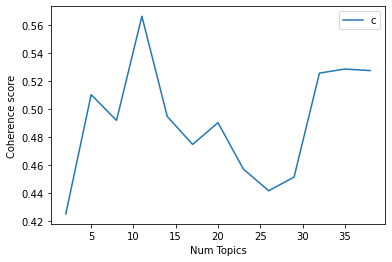

In [769]:
limit=40; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [770]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4252
Num Topics = 5  has Coherence Value of 0.5104
Num Topics = 8  has Coherence Value of 0.492
Num Topics = 11  has Coherence Value of 0.5664
Num Topics = 14  has Coherence Value of 0.4948
Num Topics = 17  has Coherence Value of 0.4748
Num Topics = 20  has Coherence Value of 0.4904
Num Topics = 23  has Coherence Value of 0.4573
Num Topics = 26  has Coherence Value of 0.4417
Num Topics = 29  has Coherence Value of 0.4515
Num Topics = 32  has Coherence Value of 0.5258
Num Topics = 35  has Coherence Value of 0.5287
Num Topics = 38  has Coherence Value of 0.5276


In [771]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.034*"one" + 0.027*"decision" + 0.026*"give" + 0.018*"th" + 0.017*"medium" '
  '+ 0.016*"print" + 0.015*"fail" + 0.015*"indian" + 0.013*"date" + '
  '0.013*"stand"'),
 (1,
  '0.092*"modi" + 0.049*"holder" + 0.032*"get" + 0.019*"must" + 0.018*"every" '
  '+ 0.015*"issue" + 0.015*"cause" + 0.014*"clear" + 0.013*"deposit" + '
  '0.012*"accept"'),
 (2,
  '0.108*"money" + 0.101*"black" + 0.084*"demonetization" + 0.034*"blackmoney" '
  '+ 0.031*"demonetisation" + 0.025*"amp" + 0.025*"people" + 0.020*"india" + '
  '0.018*"pm" + 0.014*"bank"'),
 (3,
  '0.031*"modis" + 0.025*"via" + 0.019*"reduce" + 0.017*"transaction" + '
  '0.016*"also" + 0.014*"bad" + 0.013*"start" + 0.013*"end" + 0.013*"mean" + '
  '0.012*"policy"'),
 (4,
  '0.047*"know" + 0.025*"demonetization" + 0.020*"would" + 0.020*"move" + '
  '0.015*"time" + 0.011*"loss" + 0.011*"real" + 0.011*"daily" + 0.010*"fact" + '
  '0.010*"false"'),
 (5,
  '0.050*"dont" + 0.019*"wrong" + 0.018*"much" + 0.017*"yes" + 0.016*"pay" + '
  '

In [772]:
optimal_model[corpus][2]

([(0, 0.09871082),
  (1, 0.018410925),
  (2, 0.21181181),
  (3, 0.017921815),
  (4, 0.017771795),
  (5, 0.010801907),
  (6, 0.026406065),
  (7, 0.5530421),
  (8, 0.019862214),
  (9, 0.015298096)],
 [(2, [2]),
  (18, [0]),
  (19, [7]),
  (20, [7]),
  (21, [7]),
  (22, [7]),
  (23, [7]),
  (24, [7])],
 [(2, [(2, 0.9924495)]),
  (18, [(0, 0.9997867)]),
  (19, [(7, 0.9963539)]),
  (20, [(7, 0.9999064)]),
  (21, [(7, 0.9963539)]),
  (22, [(7, 0.9999847)]),
  (23, [(7, 0.9999822)]),
  (24, [(7, 1.9999956)])])

### Topic Distribution across documents

In [773]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        #print(row)
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)


<ipython-input-773-2e8a4a58083a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-773-2e8a4a58083a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [774]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [775]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.3922,"money, black, demonetization, blackmoney, demo...",might have had good intention behind demoneti...
1,1,4,0.4102,"know, demonetization, would, move, time, loss,...",There has been a major cut off in Oxygen of Co...
2,2,7,0.5530,"support, back, cr, come, ur, nation, watch, se...",We are supporting Demonetization to support ...
3,3,10,0.5851,"like, last, benefit, detail, nov, income, poli...",ANAND FORGOT HE WAS ANCHORING A PROG ON DEMON...
4,4,9,0.3833,"account, none, let, please, bring, hard, work,...",Join us as me and my colleagues bring you a gr...
5,5,10,0.4408,"like, last, benefit, detail, nov, income, poli...",18 Demonetization Aadhaar linked Groceryinsura...
6,6,4,0.4140,"know, demonetization, would, move, time, loss,...",My article on Todays Business Week Magazine En...
7,7,2,0.7346,"money, black, demonetization, blackmoney, demo...",BIGGEST POSITIVE RESULT OF DEMONETIZATION MAN ...
8,8,10,0.6839,"like, last, benefit, detail, nov, income, poli...",Could you share more details We are about to ...
9,9,0,0.5232,"one, decision, give, th, medium, print, fail, ...",An interesting read Why demonetization will li...


In [776]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]
topic_num_keywords = topic_num_keywords.drop_duplicates(keep='last')
topic_num_keywords['index'] = topic_num_keywords['Dominant_Topic']
topic_num_keywords = topic_num_keywords.set_index('index')

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_phase1_dominant = df_dominant_topics.reset_index(drop=True)
df_phase1_dominant

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,10,"like, last, benefit, detail, nov, income, poli...",20,0.0208
1,3,"modis, via, reduce, transaction, also, bad, st...",47,0.0489
2,8,"punjab, agra_namoinagra, youll_support, r, cur...",55,0.0572
3,7,"support, back, cr, come, ur, nation, watch, se...",14,0.0146
4,4,"know, demonetization, would, move, time, loss,...",49,0.0510
5,5,"dont, wrong, much, yes, pay, protest, didi, pe...",30,0.0312
6,6,"govt, note, opposition, see, suffer, well, dem...",49,0.0510
7,9,"account, none, let, please, bring, hard, work,...",28,0.0291
8,0,"one, decision, give, th, medium, print, fail, ...",39,0.0406
9,2,"money, black, demonetization, blackmoney, demo...",602,0.6264


In [802]:
df_phase1_dominant['Topic_Keywords'][6]

'govt, note, opposition, see, suffer, well, demonetization, never, great, create'

## Topic Modelling for Phase 2 Data

In [777]:
stop_words = stopwords.words('english')

In [778]:
# convert to list
data = df2['clean content'].values.tolist()

In [779]:
data_words = list(sent_to_words(data))

In [780]:
data_words[:2][1]

['what',
 'did',
 'we',
 'achieve',
 'by',
 'demonetization',
 'deaths',
 'huge',
 'inconvenience',
 'to',
 'common',
 'people',
 'economic',
 'slowdownlakhs',
 'of',
 'people',
 'lost',
 'their',
 'job']

In [781]:
print(trigram_mod[bigram_mod[data_words[:2][1]]])

['what', 'did', 'we', 'achieve', 'by', 'demonetization', 'deaths', 'huge', 'inconvenience', 'to', 'common', 'people', 'economic', 'slowdownlakhs', 'of', 'people', 'lost', 'their', 'job']


In [782]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized = lemmatization(data_words_bigrams)

print(data_lemmatized[:2][1])

['achieve', 'demonetization', 'death', 'huge', 'inconvenience', 'common', 'people', 'economic', 'slowdownlakhs', 'people', 'lose', 'job']


In [783]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]]


In [784]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=11, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [785]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.036*"demonetization" + 0.030*"one" + 0.023*"time" + 0.018*"day" + '
  '0.015*"every" + 0.015*"cr" + 0.015*"ask" + 0.013*"exemption" + '
  '0.013*"number" + 0.013*"right"'),
 (1,
  '0.047*"bank" + 0.042*"money" + 0.040*"black" + 0.034*"account" + '
  '0.026*"exchange" + 0.026*"want" + 0.022*"deposit" + 0.019*"hv" + '
  '0.017*"action" + 0.013*"involve"'),
 (2,
  '0.105*"demonetization" + 0.036*"amp" + 0.031*"go" + 0.022*"people" + '
  '0.018*"cash" + 0.017*"india" + 0.017*"poor" + 0.015*"would" + '
  '0.013*"digital" + 0.013*"stop"'),
 (3,
  '0.133*"black" + 0.127*"money" + 0.038*"blackmoney" + 0.031*"pm" + '
  '0.029*"corruption" + 0.028*"govt" + 0.023*"demonetisation" + 0.019*"tax" + '
  '0.018*"fight" + 0.018*"political"'),
 (4,
  '0.057*"money" + 0.053*"make" + 0.048*"black" + 0.034*"crore" + 0.025*"good" '
  '+ 0.021*"help" + 0.019*"currency" + 0.019*"support" + 0.017*"bring" + '
  '0.013*"bank"'),
 (5,
  '0.050*"india" + 0.033*"black" + 0.032*"money" + 0.029*"use" + 0.02

In [786]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.086985239497523

Coherence Score:  0.48859893737312243


In [787]:
# Visualize the topics
pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
lda_viz 

/Users/ajinkyapawale/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.205434  0.169607       1        1  16.900940
3      0.230986  0.049721       2        1  16.372900
9      0.028504  0.218250       3        1  12.144724
7      0.196924 -0.004062       4        1  10.875209
4      0.119674 -0.033014       5        1   9.099747
8     -0.163960  0.008531       6        1   8.533021
0     -0.134017 -0.069869       7        1   7.419371
1      0.074829 -0.061018       8        1   5.867250
5      0.028248 -0.049322       9        1   5.267013
10    -0.101891 -0.106331      10        1   4.921733
6     -0.073864 -0.122493      11        1   2.598092, topic_info=                Term        Freq       Total Category  logprob  loglift
127            black  423.000000  423.000000  Default  30.0000  30.0000
27             money  430.000000  430.000000  Default  29.0000  29.0000
3     demonetization  281.000000  281.000000  Default  28.0000  28.0000
192              get   70.000000   70.000000  Default  27.0000  27.0000
253            party   55.000000   55.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
2301         speaker    1.005310    1.716772  Topic11  -5.5056   3.1152
519           honble    0.951059    1.662671  Topic11  -5.5610   3.0918
517        executive    0.898962    1.610535  Topic11  -5.6174   3.0673
760            clear    0.887112    1.598582  Topic11  -5.6306   3.0615
576              win    1.864718    3.838285  Topic11  -4.8878   2.9285

[420 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2974      3  0.952186   aadhar
319       8  0.951771      aap
366       4  0.927273   accept
370       8  0.955747  account
470       9  0.978602      act
...     ...       ...      ...
1398     10  0.818995  worried
42        1  0.968986    would
2982      4  0.863108    yadav
263       1  0.925109     year
1886      2  0.974369      yes

[404 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 10, 8, 5, 9, 1, 2, 6, 11, 7])

In [788]:
# Calculating optimal topics for LDA using the coherence value
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [789]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=3)

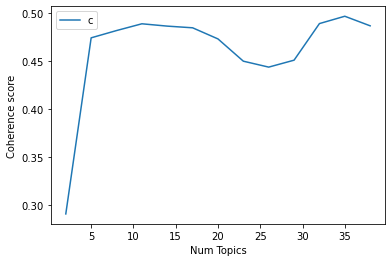

In [790]:
limit=40; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [791]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2912
Num Topics = 5  has Coherence Value of 0.474
Num Topics = 8  has Coherence Value of 0.4816
Num Topics = 11  has Coherence Value of 0.4886
Num Topics = 14  has Coherence Value of 0.4862
Num Topics = 17  has Coherence Value of 0.4844
Num Topics = 20  has Coherence Value of 0.4729
Num Topics = 23  has Coherence Value of 0.4498
Num Topics = 26  has Coherence Value of 0.4436
Num Topics = 29  has Coherence Value of 0.4508
Num Topics = 32  has Coherence Value of 0.4888
Num Topics = 35  has Coherence Value of 0.4964
Num Topics = 38  has Coherence Value of 0.4865


In [792]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.036*"demonetization" + 0.030*"one" + 0.023*"time" + 0.018*"day" + '
  '0.015*"every" + 0.015*"cr" + 0.015*"ask" + 0.013*"exemption" + '
  '0.013*"number" + 0.013*"right"'),
 (1,
  '0.047*"bank" + 0.042*"money" + 0.040*"black" + 0.034*"account" + '
  '0.026*"exchange" + 0.026*"want" + 0.022*"deposit" + 0.019*"hv" + '
  '0.017*"action" + 0.013*"involve"'),
 (2,
  '0.105*"demonetization" + 0.036*"amp" + 0.031*"go" + 0.022*"people" + '
  '0.018*"cash" + 0.017*"india" + 0.017*"poor" + 0.015*"would" + '
  '0.013*"digital" + 0.013*"stop"'),
 (3,
  '0.133*"black" + 0.127*"money" + 0.038*"blackmoney" + 0.031*"pm" + '
  '0.029*"corruption" + 0.028*"govt" + 0.023*"demonetisation" + 0.019*"tax" + '
  '0.018*"fight" + 0.018*"political"'),
 (4,
  '0.057*"money" + 0.053*"make" + 0.048*"black" + 0.034*"crore" + 0.025*"good" '
  '+ 0.021*"help" + 0.019*"currency" + 0.019*"support" + 0.017*"bring" + '
  '0.013*"bank"'),
 (5,
  '0.050*"india" + 0.033*"black" + 0.032*"money" + 0.029*"use" + 0.02

### Topic Distribution across documents

In [793]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)


<ipython-input-773-2e8a4a58083a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-773-2e8a4a58083a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [794]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [795]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9,0.7925,"get, amp, money, black, note, way, day, demone...",Transaction fee on epayments is bad concept po...
1,1,4,0.5345,"money, make, black, crore, good, help, currenc...",What did we achieve by Demonetization 150 Deat...
2,2,4,0.6877,"money, make, black, crore, good, help, currenc...",Another setback to the demonetization drive as...
3,3,2,0.5361,"demonetization, amp, go, people, cash, india, ...",may be it would be a correct analysis but con...
4,4,2,0.5961,"demonetization, amp, go, people, cash, india, ...",PM begins his speech at 4India NationalExecut...
5,5,2,0.5402,"demonetization, amp, go, people, cash, india, ...",Poor ATM at Delhi Airport had no takers from t...
6,6,5,0.5586,"india, black, money, use, act, give, much, sca...",Demonetization has brought Indias Mothers amp ...
7,7,8,0.7782,"demonetization, modi, like, india, business, a...",VIMUDRIKARAN is Hindi for demonetization A new...
8,8,10,0.6878,"need, opposition, know, st, since, demonetizat...",Did he knew that govt was implementing demonet...
9,9,8,0.5894,"demonetization, modi, like, india, business, a...",Nothing like telling it as it is from ground z...


In [796]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]
topic_num_keywords = topic_num_keywords.drop_duplicates(keep='last')
topic_num_keywords['index'] = topic_num_keywords['Dominant_Topic']
topic_num_keywords = topic_num_keywords.set_index('index')

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_phase2_dominant = df_dominant_topics.reset_index(drop=True)
df_phase2_dominant

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,10,"need, opposition, know, st, since, demonetizat...",39,0.0421
1,8,"demonetization, modi, like, india, business, a...",86,0.0929
2,0,"demonetization, one, time, day, every, cr, ask...",67,0.0724
3,5,"india, black, money, use, act, give, much, sca...",51,0.0551
4,6,"dont, holder, dear, bjp, ready, father, knw, f...",17,0.0184
5,2,"demonetization, amp, go, people, cash, india, ...",150,0.1620
6,3,"black, money, blackmoney, pm, corruption, govt...",179,0.1933
7,7,"money, black, party, big, already, really, con...",98,0.1058
8,1,"bank, money, black, account, exchange, want, d...",56,0.0605
9,4,"money, make, black, crore, good, help, currenc...",75,0.0810


In [805]:
df_phase2_dominant['Topic_Keywords'][10]

'get, amp, money, black, note, way, day, demonetization, see, rid'